# Sensitivity analysis

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
from os.path import join
import pandas as pd
import numpy as np
import json
import seaborn as sns

from scseirx import analysis_functions as af
import data_analysis_functions as daf
from data_creation_functions import format_none_column

## Parameter ranges and scenarios

### Test sensitivity

**Parameter range**  
Antigen test sensitivity is varied from 10% to 100% in steps of 10%. Simulations are conducted in a scenario where teachers and students are tested once per week but no other NPIs are implemented.

### Testing rate

**Parameter range**  
Here we assume that instead of 100%, a smaller percentage of teachers and students participate in the voluntary tests. We vary the testing rate of teachers and students together in steps of 10% from 10% to 100%. Simulations are conducted in a scenario where teachers and students are tested once per week but no other NPIs are implemented.

### Class size reduction

**Parameter range**  
Here, we assume that instead of 50% of the students, a smaller percentage of students stay at home every second day. The rest participates normally in lessons. Parameter range of % students that stay at home varies between 20% and 80% in steps of 10%. Simulations are conducted in a scenario where only class size reductions as only NPI are implemented.

### Ventilation efficiency

**Parameter range**  
Here, we vary the efficiency of ventilation to reduce transmission risk between 10% and 80% in steps of 10%. No other NPIs next to ventilation are implemented in the simulated scenario.

### Mask efficiency

**Parameter range**  
Here, we vary the efficiency of masks work by both the transmitting agent and the receiving agent. The efficiency for both exhaling and inhaling is varied together. We simulate scenarios with +40\%, +30\%, '+20\%, +10\%, +-0\%, -10\% and -20\% efficiency. No other NPIs next to masks for teachers and students are implemented in the simulated scenario.

### Added friendship contacts

Here we assume, that there are a number of additional random contacts between students of different classes (right now, these contacts only occur during daycare or through siblings). In the simulated scenarios, no NPIs are implemented.

**Parameter range**  
We add one random contact per student to a random student from a random class other than the student's class for a percentage of students of every class.  Percent of students that get one cross-class contact:
* 5%
* 10%
* 15%
* 20%
* 25%
* 30%

### Transmissibility

**Parameter range**  
Here we assume that a variant with even higher transmissibility than delta is introduced. We multiply the base transmission risk $\beta$ by a factor that ranges from 0.7 to 2.0.

### Age dependent transmission risk

Here we simulate a range of scenarios for the 2.5 and 97.5 percentile values for the transmission risk age dependence from the calibration.

**Scenarios**
* no measures
* testing teachers & students 1x / week
* testing teachers & students 2x / week
* testing teachers & students 1x / week + masks for teachers and students
* testing teachers & students 2x / week + masks for teachers and students
* testing teachers & students 1x / week + reduced class sizes
* testing teachers & students 2x / week + reduced class sizes
* masks for teachers and students + reduced class sizes
* all measures
=5*6 = 30 scenarios

### Contact weight

Here we simulate a range of scenarios for the 2.5 and 97.5 percentile values for the contact weight from the calibration.

**Scenarios**
* no measures
* testing teachers & students 1x / week
* testing teachers & students 2x / week
* testing teachers & students 1x / week + masks for teachers and students
* testing teachers & students 2x / week + masks for teachers and students
* testing teachers & students 1x / week + reduced class sizes
* testing teachers & students 2x / week + reduced class sizes
* masks for teachers and students + reduced class sizes
* all measures
=5*6 = 30 scenarios

### Worst case

Here we assume that all NPIs are not fully effective (a combination of the parameters described above). We do not sample a parameter range but rather a fixed (bot consevative) value for every parameter in a range of scenarios.  

**Scenarios**
* no measures
* testing teachers & students 1x / week
* testing teachers & students 2x / week
* testing teachers & students 1x / week + masks for teachers and students
* testing teachers & students 2x / week + masks for teachers and students
* testing teachers & students 1x / week + reduced class sizes
* testing teachers & students 2x / week + reduced class sizes
* masks for teachers and students + reduced class sizes
* all measures
=5*6 = 30 scenarios

### Worst case and vaccinations

Here we assume that all NPIs are not fully effective (a combination of the parameters described above). We do not sample a parameter range but rather a fixed (bot consevative) value for every parameter in a range of scenarios. In addition, we implement two vaccination scenarios: (I) 80% vaccinated teachers, 60% vaccinated family members, 0% vaccinated students and (II) 80% vaccinated teachers, 60% vaccinated family members, 50% vaccinated students.

**Scenarios**
* no measures
* testing teachers & students 1x / week
* testing teachers & students 2x / week
* testing teachers & students 1x / week + masks for teachers and students
* testing teachers & students 2x / week + masks for teachers and students
* testing teachers & students 1x / week + reduced class sizes
* testing teachers & students 2x / week + reduced class sizes
* masks for teachers and students + reduced class sizes
* all measures
=5*6 = 30 scenarios

## Visualization individual dimensions

In [41]:
# load the scenario parameters
testing_rate_screening_params = pd.read_csv(join('screening_params',
                                                        'testing_rate.csv'))

test_sensitivity_screening_params = pd.read_csv(join('screening_params',
                                                        'test_sensitivity.csv'))

reduced_class_size_screening_params = pd.read_csv(join('screening_params',
                                                    'reduced_class_size.csv'))
reduced_class_size_screening_params['s_screen_interval'] = \
    reduced_class_size_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')

reduced_class_size_screening_params['t_screen_interval'] = \
    reduced_class_size_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

ventilation_efficiency_screening_params = pd.read_csv(join('screening_params',
                                                'ventilation_efficiency.csv'))
ventilation_efficiency_screening_params['s_screen_interval'] = \
    ventilation_efficiency_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
ventilation_efficiency_screening_params['t_screen_interval'] = \
    ventilation_efficiency_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

mask_efficiency_screening_params = pd.read_csv(join('screening_params',
                                                'mask_efficiency.csv'))
mask_efficiency_screening_params['s_screen_interval'] = \
    mask_efficiency_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
mask_efficiency_screening_params['t_screen_interval'] = \
    mask_efficiency_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

added_friendship_contacts_screening_params = pd.read_csv(join('screening_params',
                                            'added_friendship_contacts.csv'))
added_friendship_contacts_screening_params['s_screen_interval'] = \
    added_friendship_contacts_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
added_friendship_contacts_screening_params['t_screen_interval'] = \
    added_friendship_contacts_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

transmissibility_screening_params = pd.read_csv(join('screening_params',
                                            'transmissibility.csv'))
transmissibility_screening_params['s_screen_interval'] = \
    transmissibility_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
transmissibility_screening_params['t_screen_interval'] = \
    transmissibility_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

worst_case_screening_params = pd.read_csv(join('screening_params',
                                            'worst_case.csv'))
worst_case_screening_params['s_screen_interval'] = \
    worst_case_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
worst_case_screening_params['t_screen_interval'] = \
    worst_case_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

worst_case_and_vaccinations_screening_params = pd.read_csv(join('screening_params',
                                            'worst_case_and_vaccinations.csv'))
worst_case_and_vaccinations_screening_params['s_screen_interval'] = \
    worst_case_and_vaccinations_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
worst_case_and_vaccinations_screening_params['t_screen_interval'] = \
    worst_case_and_vaccinations_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

age_dependent_transmission_risk_screening_params = pd.read_csv(join('screening_params',
                                            'age_dependent_transmission_risk.csv'))
age_dependent_transmission_risk_screening_params['s_screen_interval'] = \
    age_dependent_transmission_risk_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
age_dependent_transmission_risk_screening_params['t_screen_interval'] = \
    age_dependent_transmission_risk_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

contact_weight_screening_params = pd.read_csv(join('screening_params',
                                            'contact_weight.csv'))
contact_weight_screening_params['s_screen_interval'] = \
    contact_weight_screening_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
contact_weight_screening_params['t_screen_interval'] = \
    contact_weight_screening_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

In [42]:
param_collection = {
    'ventilation_efficiency':ventilation_efficiency_screening_params,
    'testing_rate':testing_rate_screening_params,
    'mask_efficiency':mask_efficiency_screening_params,
    'test_sensitivity':test_sensitivity_screening_params,
    'class_size_reduction':reduced_class_size_screening_params,
    'added_friendship_contacts':added_friendship_contacts_screening_params,
    'transmissibility':transmissibility_screening_params,
    'worst_case':worst_case_screening_params,
    'worst_case_and_vaccinations':worst_case_and_vaccinations_screening_params,
    'age_dependent_transmission_risk':age_dependent_transmission_risk_screening_params,
    'contact_weight':contact_weight_screening_params
}

# if just the minimum necessary number of scenarios was simulated, we need to
# truncate the screening parameter lists
cutoffs = {
    'ventilation_efficiency':16,
    'testing_rate':18,
    'mask_efficiency':14,
    'test_sensitivity':18,
    'class_size_reduction':16,
    'added_friendship_contacts':16,
    'transmissibility':27,
    'worst_case':18,
    'worst_case_and_vaccinations':18,
    'age_dependent_transmission_risk':36,
    'contact_weight':36
}

for dim in param_collection.keys():
    param_collection[dim] = param_collection[dim][0:cutoffs[dim]]

### Parameters

In [5]:
observables_of_interest = ['infected_agents', 'R0']

school_types = ['primary', 'primary_dc', 'lower_secondary', 'lower_secondary_dc',
                'upper_secondary', 'secondary']

stype_names = {'primary':'primary', 'primary_dc':'primary\nwith daycare',
               'lower_secondary':'lower\nsecondary',
               'lower_secondary_dc':'lower\nsecondary\nwith daycare',
               'upper_secondary':'upper\nsecondary', 'secondary':'secondary',
               'secondary_dc':'secondary\nwith daycare'}

### Read baseline data

In [6]:
src_path = '../../data/intervention_measures_delta/simulation_results' 
baseline_data = daf.get_baseline_data(src_path)

### Test sensitivity

In [7]:
src_path = '../../data/sensitivity_analysis/simulation_results/test_sensitivity'
test_sensitivity_data = daf.get_test_sensitivity_data(src_path, 
                    param_collection['test_sensitivity'], baseline_data)

sensitivities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sensitivities.reverse()
hmaps_test_sensitivity = daf.build_test_sensitivity_heatmap(\
                    test_sensitivity_data, sensitivities)

	primary
	primary_dc
	lower_secondary
	lower_secondary_dc
	upper_secondary
	secondary


<ipython-input-8-4397823c80ec>:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


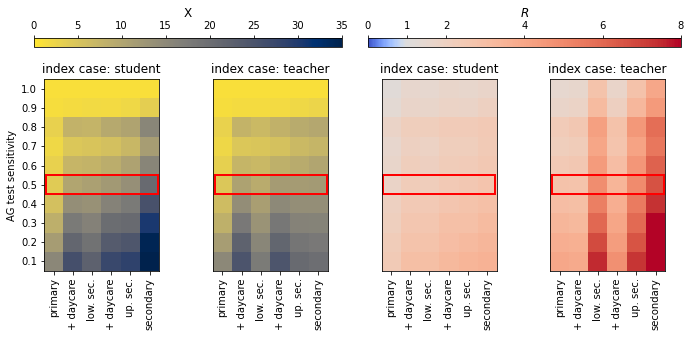

In [8]:
dst = '../../plots/sensitivity_analysis/'

fig, axes = plt.subplots(1, 4, figsize=(10, 4))
for i, observable, cmap in zip(range(2), ['N_infected', 'R0'],
                    [plt.get_cmap('cividis_r'), plt.get_cmap('coolwarm')]):
    
    for j, index_case in enumerate(['student', 'teacher']):
        ax = axes[2*i + j]
        
        if observable == 'N_infected':
            img = ax.imshow(hmaps_test_sensitivity[observable][index_case],
                         vmin=0, vmax=35, cmap=cmap)
        else:
            img = ax.imshow(hmaps_test_sensitivity[observable][index_case], 
                        clim = (0, 8), 
                        norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=8),
                        cmap = cmap)
        hmaps_test_sensitivity[observable]['img'] = img
        
        if 2*i + j == 0:
            ax.set_yticks(range(len(sensitivities)))
            ax.set_yticklabels(sensitivities)
            ax.set_ylabel('AG test sensitivity')
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        ax.set_title('index case: {}'.format(index_case))
        ax.set_xticks(range(len(school_types)))
        ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'up. sec.', 'secondary'], fontsize=10)
        ax.tick_params(axis='x', rotation=90)


cbar_ax1 = fig.add_axes([0.079, 1.02, 0.428, 0.03])
cbar = fig.colorbar(hmaps_test_sensitivity['N_infected']['img'], cax=cbar_ax1, 
                    orientation='horizontal', ticks=[0, 5, 10, 15, 20, 25, 30, 35])
cbar.set_label('X', fontsize=12)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = fig.add_axes([0.543, 1.02, 0.435, 0.03])
cbar = fig.colorbar(hmaps_test_sensitivity['R0']['img'], cax=cbar_ax2, 
                    orientation='horizontal', ticks=[0, 1, 2, 4, 6, 8])
cbar.set_label('$R$', fontsize=12)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

# draw a box around the conservative estimate
for ax in axes:
    rect = Rectangle((-0.41, 4.5), 5.85, 1,
                 linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.subplots_adjust(wspace=0.07, hspace=None)
fig.tight_layout()

plt.savefig(join(dst, 'sensitivity_analysis_test_sensitivity.pdf'),
            transparent=True)
plt.savefig(join(dst, 'sensitivity_analysis_test_sensitivity.svg'),
            transparent=True)

### Testing rate

In [9]:
src_path = '../../data/sensitivity_analysis/simulation_results/testing_rate'
testing_rate_data = daf.get_testing_rate_data(src_path,
                            param_collection['testing_rate'], baseline_data)

testing_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
testing_rates.reverse()
testing_rates = np.asarray(testing_rates)
hmaps_testing_rate = daf.build_testing_rate_heatmaps(testing_rate_data, 
                                                     testing_rates)

	primary
	primary_dc
	lower_secondary
	lower_secondary_dc
	upper_secondary
	secondary


<ipython-input-10-dd79dc47b53e>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


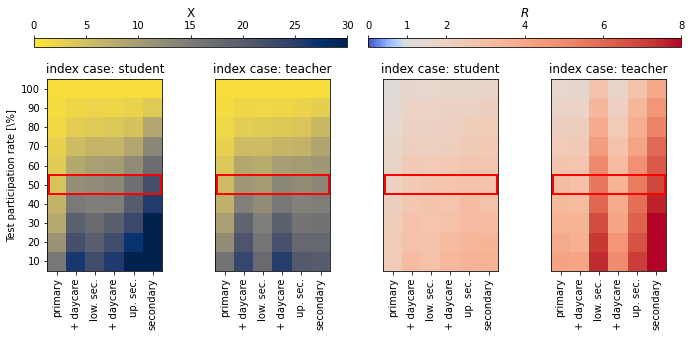

In [10]:
dst = '../../plots/sensitivity_analysis/'

# make the plots
fig, axes = plt.subplots(1, 4, figsize=(10, 4))
for i, observable, cmap in zip(range(2), ['N_infected', 'R0'],
                    [plt.get_cmap('cividis_r'), plt.get_cmap('coolwarm')]):

    for j, index_case in enumerate(['student', 'teacher']):
        ax = axes[2*i + j]
        
        if observable == 'N_infected':
            img = ax.imshow(hmaps_testing_rate[observable][index_case],
                         vmin=0, vmax=30, cmap=cmap)
        else:
            img = ax.imshow(hmaps_testing_rate[observable][index_case], 
                        clim = (0, 8), 
                        norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=8),
                        cmap = cmap)
        hmaps_testing_rate[observable]['img'] = img
        
        if 2*i + j == 0:
            ax.set_yticks(range(len(testing_rates)))
            ax.set_yticklabels([int(t) for t in testing_rates * 100])
            ax.set_ylabel('Test participation rate [\%]')
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        ax.set_title('index case: {}'.format(index_case))
        ax.set_xticks(range(len(school_types)))
        ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'up. sec.', 'secondary'], fontsize=10)
        ax.tick_params(axis='x', rotation=90)


cbar_ax1 = fig.add_axes([0.079, 1.02, 0.435, 0.03])
cbar = fig.colorbar(hmaps_testing_rate['N_infected']['img'], cax=cbar_ax1, 
                    orientation='horizontal', ticks=[0, 5, 10, 15, 20, 25, 30])
cbar.set_label('X', fontsize=12)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = fig.add_axes([0.543, 1.02, 0.435, 0.03])
cbar = fig.colorbar(hmaps_testing_rate['R0']['img'], cax=cbar_ax2,
                    orientation='horizontal', ticks=[0, 1, 2, 4, 6, 8])
cbar.set_label('$R$', fontsize=12)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

# draw a box around the conservative estimate
for ax in axes:
    rect = Rectangle((-0.41, 4.5), 5.85, 1,
                 linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.subplots_adjust(wspace=0.07, hspace=None)
fig.tight_layout()
plt.savefig(join(dst, 'sensitivity_analysis_testing_rate.pdf'),
            transparent=True)
plt.savefig(join(dst, 'sensitivity_analysis_testing_rate.svg'),
            transparent=True)

### Class size reduction

In [11]:
src_path = '../../data/sensitivity_analysis/simulation_results/reduced_class_size'
class_size_reduction_data = daf.get_class_size_reduction_data(src_path,
                            param_collection['class_size_reduction'])

class_size_reductions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
class_size_reductions.reverse()
class_size_reductions = np.asarray(class_size_reductions)
hmaps_class_size_reduction = daf.build_class_size_reduction_heatmaps(\
                    class_size_reduction_data, class_size_reductions)

	primary
	primary_dc
	lower_secondary
	lower_secondary_dc
	upper_secondary
	secondary


<ipython-input-12-e302dca1d3ec>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


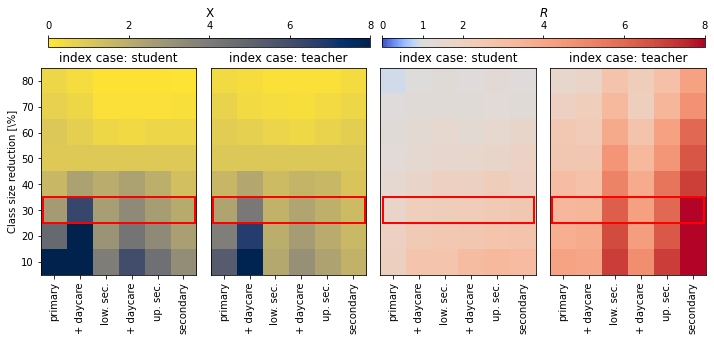

In [12]:
dst = '../../plots/sensitivity_analysis/'

fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for i, observable, cmap in zip(range(2), ['N_infected', 'R0'],
                    [plt.get_cmap('cividis_r'), plt.get_cmap('coolwarm')]):
    
    for j, index_case in enumerate(['student', 'teacher']):
        ax = axes[2*i + j]
        if observable == 'N_infected':
            img = ax.imshow(hmaps_class_size_reduction[observable][index_case],
                         vmin=0, vmax=8, cmap=cmap)
        else:
            img = ax.imshow(hmaps_class_size_reduction[observable][index_case], 
                        clim = (0, 8), 
                        norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=8),
                        cmap = cmap)
            
        hmaps_class_size_reduction[observable]['img'] = img
        
        if 2*i + j == 0:
            ax.set_yticks(range(len(class_size_reductions)))
            ax.set_yticklabels([int(t) for t in class_size_reductions * 100])
            ax.set_ylabel('Class size reduction [\%]')
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        ax.set_title('index case: {}'.format(index_case))
        ax.set_xticks(range(len(school_types)))
        ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'up. sec.', 'secondary'], fontsize=10)
        ax.tick_params(axis='x', rotation=90)


cbar_ax1 = fig.add_axes([0.072, 1, 0.4475, 0.03])
cbar = fig.colorbar(hmaps_class_size_reduction['N_infected']['img'], cax=cbar_ax1, 
                    orientation='horizontal', ticks=[0, 2, 4, 6, 8])
cbar.set_label('X', fontsize=12)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = fig.add_axes([0.536, 1, 0.4475, 0.03])
cbar = fig.colorbar(hmaps_class_size_reduction['R0']['img'], cax=cbar_ax2, 
                    orientation='horizontal', ticks=[0, 1, 2, 4, 6, 8])
cbar.set_label('$R$', fontsize=12)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.07, hspace=None)

# draw a box around the conservative estimate
for ax in axes:
    rect = Rectangle((-0.41, 4.5), 5.85, 1,
                 linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

fig.tight_layout()
plt.savefig(join(dst, 'sensitivity_analysis_reduced_class_size.pdf'),
            transparent=True)
plt.savefig(join(dst, 'sensitivity_analysis_reduced_class_size.svg'),
            transparent=True)

### Ventilation efficiency

In [13]:
src_path = '../../data/sensitivity_analysis/simulation_results/ventilation_efficiency'
ventilation_efficiency_data = daf.get_ventilation_efficiency_data(src_path,
                         param_collection['ventilation_efficiency'], baseline_data)

ventilation_efficiencies = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ventilation_efficiencies = np.asarray(ventilation_efficiencies)
hmaps_ventilation_efficiency = daf.build_ventilation_efficiency_heatmaps(\
                ventilation_efficiency_data, ventilation_efficiencies)

	primary
	primary_dc
	lower_secondary
	lower_secondary_dc
	upper_secondary
	secondary


<ipython-input-14-e4dd1dbf4348>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


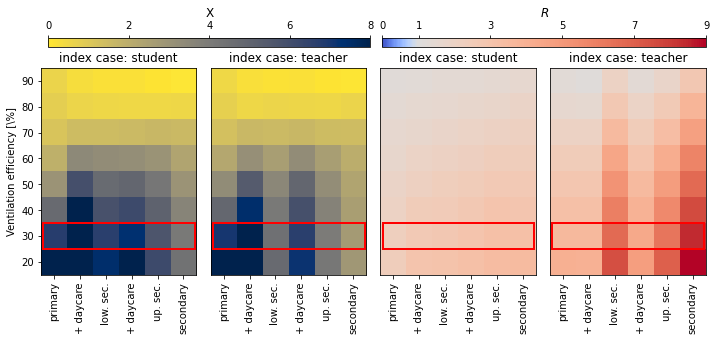

In [14]:
dst = '../../plots/sensitivity_analysis/'

fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for i, observable, cmap in zip(range(2), ['N_infected', 'R0'],
                    [plt.get_cmap('cividis_r'), plt.get_cmap('coolwarm')]):

    for j, index_case in enumerate(['student', 'teacher']):
        ax = axes[2*i + j]
        if observable == 'N_infected':
            img = ax.imshow(hmaps_ventilation_efficiency[observable][index_case],
                         vmin=0, vmax=8, cmap=cmap)
        else:
            img = ax.imshow(hmaps_ventilation_efficiency[observable][index_case], 
                        clim = (0, 9), 
                        norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=9),
                        cmap = cmap)
            
        hmaps_ventilation_efficiency[observable]['img'] = img
        
        if 2*i + j == 0:
            ax.set_yticks(range(len(ventilation_efficiencies)))
            ax.set_yticklabels([round(t) for t in (1 - ventilation_efficiencies + 0.1) * 100])
            ax.set_ylabel('Ventilation efficiency [\%]')
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        ax.set_title('index case: {}'.format(index_case))
        ax.set_xticks(range(len(school_types)))
        ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'up. sec.', 'secondary'], fontsize=10)
        ax.tick_params(axis='x', rotation=90)


cbar_ax1 = fig.add_axes([0.072, 1.0, 0.4475, 0.03])
cbar = fig.colorbar(hmaps_ventilation_efficiency['N_infected']['img'], cax=cbar_ax1,
                    orientation='horizontal', ticks=[0, 2, 4, 6, 8])
cbar.set_label('X', fontsize=12)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = fig.add_axes([0.536, 1.0, 0.45, 0.03])
cbar = fig.colorbar(hmaps_ventilation_efficiency['R0']['img'], cax=cbar_ax2,
                    orientation='horizontal', ticks=[0, 1, 3, 5, 7, 9])
cbar.set_label('$R$', fontsize=12)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

# draw a box around the conservative estimate
for ax in axes:
    rect = Rectangle((-0.41, 5.5), 5.85, 1,
                 linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.subplots_adjust(wspace=0.07, hspace=None)
fig.tight_layout()
plt.savefig(join(dst, 'sensitivity_analysis_ventilation_efficiency.pdf'),
            transparent=True)
plt.savefig(join(dst, 'sensitivity_analysis_ventilation_efficiency.svg'),
            transparent=True)

### Mask efficiency

In [15]:
src_path = '../../data/sensitivity_analysis/simulation_results/mask_efficiency'
mask_efficiency_data = daf.get_mask_efficiency_data(src_path,
                         param_collection['mask_efficiency'])

mask_efficiencies_exhale = np.asarray([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
mask_efficiencies_inhale = np.asarray([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
hmaps_mask_efficiency = daf.build_mask_efficiency_heatmaps(mask_efficiency_data,
                    mask_efficiencies_exhale, mask_efficiencies_inhale)

	primary
	primary_dc
	lower_secondary
	lower_secondary_dc
	upper_secondary
	secondary


<ipython-input-16-650bbf389e81>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


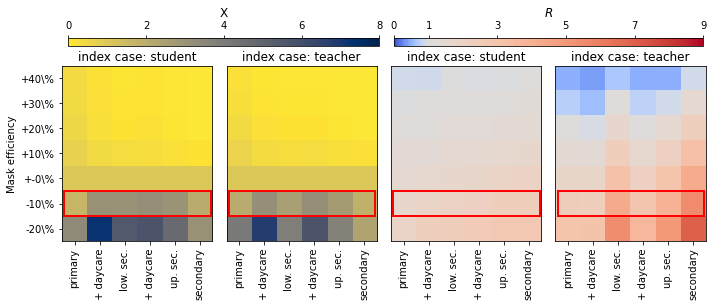

In [16]:
dst = '../../plots/sensitivity_analysis/'

fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for i, observable, cmap in zip(range(2), ['N_infected', 'R0'],
                    [plt.get_cmap('cividis_r'), plt.get_cmap('coolwarm')]):

    for j, index_case in enumerate(['student', 'teacher']):
        ax = axes[2*i + j]
        if observable == 'N_infected':
            img = ax.imshow(hmaps_mask_efficiency[observable][index_case],
                         vmin=0, vmax=8, cmap=cmap)
        else:
            img = ax.imshow(hmaps_mask_efficiency[observable][index_case], 
                        clim = (0, 9), 
                        norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=9),
                        cmap = cmap)
            
        hmaps_mask_efficiency[observable]['img'] = img
        
        if 2*i + j == 0:
            ax.set_yticks(range(len(mask_efficiencies_exhale)))
            ax.set_yticklabels(['+40\%', '+30\%', '+20\%', '+10\%', '+-0\%',
                                '-10\%', '-20\%'])
            ax.set_ylabel('Mask efficiency')
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        ax.set_title('index case: {}'.format(index_case))
        ax.set_xticks(range(len(school_types)))
        ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'up. sec.', 'secondary'], fontsize=10)
        ax.tick_params(axis='x', rotation=90)


cbar_ax1 = fig.add_axes([0.1, 0.92, 0.432, 0.03])
cbar = fig.colorbar(hmaps_mask_efficiency['N_infected']['img'], cax=cbar_ax1,
                    orientation='horizontal', ticks=[0, 2, 4, 6, 8])
cbar.set_label('X', fontsize=12)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = fig.add_axes([0.552, 0.92, 0.43, 0.03])
cbar = fig.colorbar(hmaps_mask_efficiency['R0']['img'], cax=cbar_ax2, 
                    orientation='horizontal', ticks=[0, 1, 3, 5, 7, 9])
cbar.set_label('$R$', fontsize=12)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

# draw a box around the conservative estimate
for ax in axes:
    rect = Rectangle((-0.41, 4.5), 5.85, 1,
                 linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.subplots_adjust(wspace=0.07, hspace=None)
fig.tight_layout()
plt.savefig(join(dst, 'sensitivity_analysis_mask_efficiency.pdf'),
            transparent=True)
plt.savefig(join(dst, 'sensitivity_analysis_mask_efficiency.svg'),
            transparent=True)

### Added friendship contacts

In [ ]:
src_path = '../../data/sensitivity_analysis/simulation_results/added_friendship_contacts'
added_friendship_contacts_data = daf.get_added_friendship_contacts_data(src_path,
                    param_collection['added_friendship_contacts'], baseline_data)

friendship_ratios = np.asarray([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
hmaps_added_friendship_contacts = daf.build_added_friendship_contacts_heatmaps(\
                        added_friendship_contacts_data, friendship_ratios)

In [ ]:
dst = '../../plots/sensitivity_analysis/'

# make plots
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for i, observable, cmap in zip(range(2), ['N_infected', 'R0'],
                    [plt.get_cmap('cividis_r'), plt.get_cmap('coolwarm')]):

    for j, index_case in enumerate(['student', 'teacher']):
        ax = axes[2*i + j]
        if observable == 'N_infected':
            img = ax.imshow(hmaps_added_friendship_contacts[observable][index_case],
                         vmin=1, vmax=2, cmap=cmap)
        else:
            img = ax.imshow(hmaps_added_friendship_contacts[observable][index_case], 
                        clim = (0, 9), 
                        norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=9),
                        cmap = cmap)
            
        hmaps_added_friendship_contacts[observable]['img'] = img
        
        if 2*i + j == 0:
            ax.set_yticks(range(len(friendship_ratios)))
            ax.set_yticklabels(['{:1.0f}%'.format(fr * 100) for \
                                fr in friendship_ratios])
            ax.set_ylabel('Additional between class contacts')
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        ax.set_title('index case: {}'.format(index_case))
        ax.set_xticks(range(len(school_types)))
        ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'up. sec.', 'secondary'], fontsize=10)
        ax.tick_params(axis='x', rotation=90)


cbar_ax1 = fig.add_axes([0.1, 1, 0.432, 0.03])
cbar = fig.colorbar(hmaps_added_friendship_contacts['N_infected']['img'], cax=cbar_ax1,
                    orientation='horizontal', ticks=[1, 1.2, 1.4, 1.6, 1.8, 2])
cbar.set_label('X', fontsize=12)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = fig.add_axes([0.552, 1, 0.43, 0.03])
cbar = fig.colorbar(hmaps_added_friendship_contacts['R0']['img'], cax=cbar_ax2, 
                    orientation='horizontal', ticks=[0, 1, 3, 5, 7, 9])
cbar.set_label('$R$', fontsize=12)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

# draw a box around the conservative estimate
for ax in axes:
    rect = Rectangle((-0.41, 3.5), 5.85, 1,
                 linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.subplots_adjust(wspace=0.07, hspace=None)
fig.tight_layout()
plt.savefig(join(dst, 'sensitivity_analysis_added_friendship_contacts.pdf'),
            transparent=True)
plt.savefig(join(dst, 'sensitivity_analysis_added_friendship_contacts.svg'),
            transparent=True)

### Transmissibility

In [57]:
from importlib import reload
reload(daf)

<module 'data_analysis_functions' from '/home/jana/Projects/COVID_schools/analysis/code/sensitivity_analysis/data_analysis_functions.py'>

In [69]:
src_path = '../../data/sensitivity_analysis/simulation_results/transmissibility'
transmissibility_data = daf.get_transmissibility_data(src_path,
                    param_collection['transmissibility'])

transmissibilities = np.asarray([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
                                 1.5, 1.6, 1.7, 1.8, 1.9])
hmaps_transmissibility = daf.build_transmissibility_heatmaps(\
                        transmissibility_data, transmissibilities)

	primary
	primary_dc
	lower_secondary
	lower_secondary_dc
	upper_secondary
	secondary


<ipython-input-75-76cb9f088ccb>:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


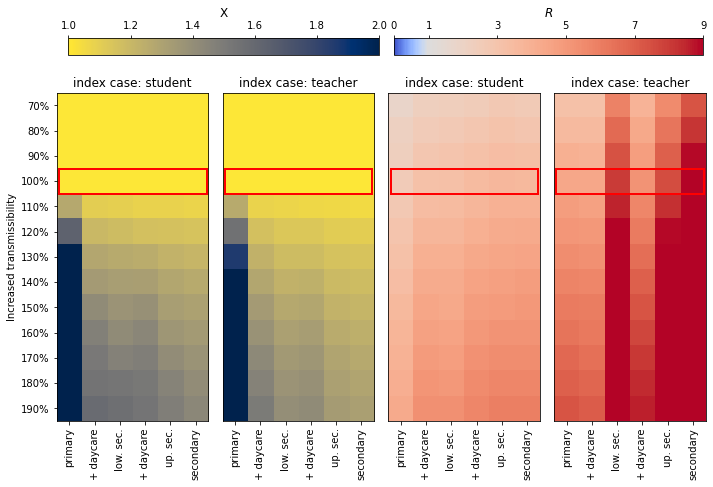

In [75]:
dst = '../../plots/sensitivity_analysis/'

# make plots
fig, axes = plt.subplots(1, 4, figsize=(10, 8))

for i, observable, cmap in zip(range(2), ['N_infected', 'R0'],
                    [plt.get_cmap('cividis_r'), plt.get_cmap('coolwarm')]):

    for j, index_case in enumerate(['student', 'teacher']):
        ax = axes[2*i + j]
        if observable == 'N_infected':
            img = ax.imshow(hmaps_transmissibility[observable][index_case],
                         vmin=1, vmax=2, cmap=cmap)
        else:
            img = ax.imshow(hmaps_transmissibility[observable][index_case], 
                        clim = (0, 9), 
                        norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=9),
                        cmap = cmap)
            
        hmaps_transmissibility[observable]['img'] = img
        
        if 2*i + j == 0:
            ax.set_yticks(range(len(transmissibilities)))
            ax.set_yticklabels(['{:1.0f}%'.format(fr * 100) for \
                                fr in transmissibilities])
            ax.set_ylabel('Increased transmissibility')
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        ax.set_title('index case: {}'.format(index_case))
        ax.set_xticks(range(len(school_types)))
        ax.set_xticklabels(['primary', '+ daycare', 'low. sec.',
                        '+ daycare', 'up. sec.', 'secondary'], fontsize=10)
        ax.tick_params(axis='x', rotation=90)


cbar_ax1 = fig.add_axes([0.1, 0.85, 0.432, 0.03])
cbar = fig.colorbar(hmaps_transmissibility['N_infected']['img'], cax=cbar_ax1,
                    orientation='horizontal', ticks=[1, 1.2, 1.4, 1.6, 1.8, 2])
cbar.set_label('X', fontsize=12)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = fig.add_axes([0.552, 0.85, 0.43, 0.03])
cbar = fig.colorbar(hmaps_transmissibility['R0']['img'], cax=cbar_ax2, 
                    orientation='horizontal', ticks=[0, 1, 3, 5, 7, 9])
cbar.set_label('$R$', fontsize=12)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

# draw a box around the conservative estimate
for ax in axes:
    rect = Rectangle((-0.41, 2.5), 5.85, 1,
                 linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.subplots_adjust(wspace=0.07, hspace=None)
fig.tight_layout()
plt.savefig(join(dst, 'sensitivity_analysis_transmissibility.pdf'),
            transparent=True)
plt.savefig(join(dst, 'sensitivity_analysis_transmissibility.svg'),
            transparent=True)

## Combined Visulaization

In [ ]:
# save the data to disk
hmaps = {
    'test_sensitivity':hmaps_test_sensitivity,
    'testing_rate':hmaps_testing_rate, 
    'class_size_reduction':hmaps_class_size_reduction,
    'ventilation_efficiency':hmaps_ventilation_efficiency, 
    'mask_efficiency':hmaps_mask_efficiency,
    'added_friendship_contacts':hmaps_added_friendship_contacts}

for dim, hmap in hmaps.items():
    for metric in ['N_infected', 'R0']:
        for index_case in ['teacher', 'student']:
            np.savetxt(join('tmp', '{}_{}_{}.npy'.format(dim, metric, index_case)),
                      hmap[metric][index_case])
            
            


In [ ]:
# load the data
dimensions = ['test_sensitivity', 'testing_rate', 'class_size_reduction', 
              'ventilation_efficiency', 'mask_efficiency', 
              'added_friendship_contacts']

heatmaps = {dim:{metric:{index_case:np.nan \
                          for index_case in ['teacher', 'student']} \
                          for metric in ['N_infected', 'R0']} \
                          for dim in dimensions}


for dim in dimensions:
    for metric in ['N_infected', 'R0']:
        for index_case in ['teacher', 'student']:
            hmap = np.loadtxt(join('tmp', '{}_{}_{}.npy'\
                                   .format(dim, metric, index_case)))
            heatmaps[dim][metric][index_case] = hmap

### Figure S4

In [ ]:
hex_list1 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2']
hex_list2 = ['#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']
hex_list3 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2',  '#f8eaad', '#faaaae', '#ff57bb']

dst = '../../plots/sensitivity_analysis/'

fig = plt.figure(figsize=(9.2, 11.3))
gs = fig.add_gridspec(2*30, 2*27)

axes_cbar = [fig.add_subplot(gs[1:2, 1*2:12*2-1]),
             fig.add_subplot(gs[1:2, 15*2:26*2-1])]

axes0 = [fig.add_subplot(gs[2*2:12*2, 0*2:6*2]),
         fig.add_subplot(gs[2*2:12*2, 7*2-1:13*2-1]),
         fig.add_subplot(gs[2*2:12*2, 14*2:20*2]),
         fig.add_subplot(gs[2*2:12*2, 21*2-1:27*2-1])]

axes1 = [fig.add_subplot(gs[12*2:22*2, 0*2:6*2]),
         fig.add_subplot(gs[12*2:22*2, 7*2-1:13*2-1]),
         fig.add_subplot(gs[12*2:22*2, 14*2:20*2]),
         fig.add_subplot(gs[12*2:22*2, 21*2-1:27*2-1])]

axes2 = [fig.add_subplot(gs[22*2:30*2, 0*2:6*2]),
         fig.add_subplot(gs[22*2:30*2, 7*2-1:13*2-1]),
         fig.add_subplot(gs[22*2:30*2, 14*2:20*2]),
         fig.add_subplot(gs[22*2:30*2, 21*2-1:27*2-1])]

axes = [axes0, axes1, axes2]
xmax = 25

sensitivities = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
daf.plot_heatmaps(axes[0], heatmaps['test_sensitivity'],
              'AG test\nsensitivity', sensitivities, 4.5, hex_list3,
              title=True, X_max=xmax)

test_participation_rates = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
daf.plot_heatmaps(axes[1], heatmaps['testing_rate'],
              'test participation\nrate [%]', test_participation_rates, 4.5,
              hex_list3, X_max=xmax)

ventilation_efficiencies = [90, 80, 70, 60, 50, 40, 30, 20]
img = daf.plot_heatmaps(axes[2], heatmaps['ventilation_efficiency'],
              'ventilation\nefficiency [%]', ventilation_efficiencies, 5.5,
              hex_list3, X_max=xmax, xticks=True)

cbar_ax1 = axes_cbar[0]
cbar = fig.colorbar(img['N_infected']['student'], cax=cbar_ax1,
                    orientation='horizontal', ticks=[0, 5, 10, 15, 20, 25])
cbar.ax.set_xticklabels(['0', '5', '10', '15', '20', '$\\geq 25$'])
cbar.set_label('X', fontsize=14)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = axes_cbar[1]
cbar = fig.colorbar(img['R0']['teacher'], cax=cbar_ax2, 
                    orientation='horizontal', ticks=[0, 1, 3, 5, 7, 9])
cbar.ax.set_xticklabels(['0', '1', '3', '5', '7', '$\\geq 9$'])
cbar.set_label('$R$', fontsize=14)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

fig.text(0.133, 0.8, 'A', fontsize=18)
fig.text(0.133, 0.548, 'B', fontsize=18)
fig.text(0.133, 0.295, 'C', fontsize=18)

plt.subplots_adjust(wspace=0, hspace=0)

#fig.tight_layout()

plt.savefig(join(dst, 'SA_overview_1.pdf'))
plt.savefig(join(dst, 'SA_overview_1.svg'))

### Figure S5

In [ ]:
# different colormaps to play around
hex_list1 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2']
hex_list2 = ['#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']
hex_list3 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2',  '#f8eaad', '#faaaae', '#ff57bb']

dst = '../../plots/sensitivity_analysis/'

fig = plt.figure(figsize=(9.2, 9.8))
gs = fig.add_gridspec(2*26, 2*27)

axes_cbar = [fig.add_subplot(gs[1:2, 1*2:12*2-1]),
             fig.add_subplot(gs[1:2, 15*2:26*2-1])]

axes0 = [fig.add_subplot(gs[2*2:9*2, 0*2:6*2]),
         fig.add_subplot(gs[2*2:9*2, 7*2-1:13*2-1]),
         fig.add_subplot(gs[2*2:9*2, 14*2:20*2]),
         fig.add_subplot(gs[2*2:9*2, 21*2-1:27*2-1])]

axes1 = [fig.add_subplot(gs[9*2:17*2, 0*2:6*2]),
         fig.add_subplot(gs[9*2:17*2, 7*2-1:13*2-1]),
         fig.add_subplot(gs[9*2:17*2, 14*2:20*2]),
         fig.add_subplot(gs[9*2:17*2, 21*2-1:27*2-1])]

axes2 = [fig.add_subplot(gs[17*2:26*2, 0*2:6*2]),
         fig.add_subplot(gs[17*2:26*2, 7*2-1:13*2-1]),
         fig.add_subplot(gs[17*2:26*2, 14*2:20*2]),
         fig.add_subplot(gs[17*2:26*2, 21*2-1:27*2-1])]

axes = [axes0, axes1, axes2]
xmax=5

mask_efficiencies = ['(90, 70)', '(80, 60)', '(70, 50)', '(60, 40)', '(50, 30)',
                     '(40, 20)', '(30, 10)']
daf.plot_heatmaps(axes[0], heatmaps['mask_efficiency'],
              'mask efficiency\n(exhale, inhale) [%]', mask_efficiencies, 4.5,
               hex_list3, title=True, X_max=xmax)

class_size_reductions = [80, 70, 60, 50, 40, 30, 20, 10]
daf.plot_heatmaps(axes[1], heatmaps['class_size_reduction'], 
              'class size\nreduction [%]', class_size_reductions, 4.5,
              hex_list3, X_max=xmax)

friendship_ratios = range(0, 41, 5)
img = daf.plot_heatmaps(axes[2], heatmaps['added_friendship_contacts'],
              'additional contacts\nbetween classes [%]', friendship_ratios, 3.5,
               hex_list3, xticks=True, X_max=xmax)

cbar_ax1 = axes_cbar[0]
cbar = fig.colorbar(img['N_infected']['student'], cax=cbar_ax1,
                    orientation='horizontal', ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_xticklabels(['0', '1', '2', '3', '4', '$\\geq 5$'])
cbar.set_label('X', fontsize=14)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

cbar_ax2 = axes_cbar[1]
cbar = fig.colorbar(img['R0']['teacher'], cax=cbar_ax2, 
                    orientation='horizontal', ticks=[0, 1, 3, 5, 7, 9])
cbar.ax.set_xticklabels(['0', '1', '3', '5', '7', '$\\geq 9$'])
cbar.set_label('$R$', fontsize=14)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=10)

fig.text(0.133, 0.788, 'A', fontsize=18)
fig.text(0.133, 0.58, 'B', fontsize=18)
fig.text(0.133, 0.346, 'C', fontsize=18)

plt.subplots_adjust(wspace=0, hspace=0)

#fig.tight_layout()

plt.savefig(join(dst, 'SA_overview_2.pdf'))
plt.savefig(join(dst, 'SA_overview_2.svg'))

## Worst cases and vaccinations

### Prepare data

In [ ]:
reload(daf)

In [ ]:
# baseline data
selected_baseline_data = baseline_data.copy()
selected_baseline_data = selected_baseline_data[\
                (selected_baseline_data['ventilation_modification'] == 0.36)]
selected_baseline_data['scenario'] = 'optimistic'

# conservative assumptions data
src_path = '../../data/sensitivity_analysis/simulation_results/worst_case'
dst = '../../data/sensitivity_analysis/simulation_results/'
worst_case_data = daf.get_worst_case_data(src_path, 
                                          param_collection['worst_case'])
worst_case_data.to_csv(join(dst, 'combined_observables.csv'),
                      index=False)

# conservative assumptions and vaccinations data
worst_case_and_vaccination_params_scenario_1 = worst_case_and_vaccinations_screening_params[\
                worst_case_and_vaccinations_screening_params['student_vaccination_ratio'] == 0]
worst_case_and_vaccination_params_scenario_2 = worst_case_and_vaccinations_screening_params[\
                worst_case_and_vaccinations_screening_params['student_vaccination_ratio'] == 0.5]
param_collection['worst_case_and_vaccinations_scenario_1'] = worst_case_and_vaccination_params_scenario_1
param_collection['worst_case_and_vaccinations_scenario_2'] = worst_case_and_vaccination_params_scenario_2

src_path = '../../data/sensitivity_analysis/simulation_results/worst_case_and_vaccinations/'
worst_case_and_vaccination_data_scenario_1 = daf.get_worst_case_and_vaccinations_data(src_path,
                                    param_collection['worst_case_and_vaccinations_scenario_1'])
worst_case_and_vaccination_data_scenario_2 = daf.get_worst_case_and_vaccinations_data(src_path,
                                    param_collection['worst_case_and_vaccinations_scenario_2'])

In [ ]:
measure_combinations = [
    # ventilation + testing 1x
    {
        'label':'vent. + testing 1x',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':False
    },
    # ventilation + testing 2x
    {
        'label':'vent. + testing 2x',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':False
    },
    # ventilation + testing 1x + masks
    {
        'label':'vent. + testing 1x + masks',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':False
    },
    # ventilation + testing 2x + masks
    {
        'label':'vent. + testing 2x + masks',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':False
    },
    # ventilation + testing 1x + reduced class size 
    {
        'label':'vent. + testing 1x + red. class size',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':True
    },
    # ventilation + testing 2x + reduced class size 
    {
        'label':'vent. + testing 2x + red. class size',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':True
    },
    # ventilation + masks + reduced class size
    {
        'label':'vent. + masks + red. class size',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':'never',
        'teacher_screen_interval':'never',
        'half_classes':True
    },
    # all measures
    {
        'label':'all measures',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':True
    }
]

In [ ]:
colormaps = {'conservative':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'vaccination_1':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'vaccination_2':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'baseline':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
            }


for index_case in ['student', 'teacher']:
    for data, scenario in zip(\
                [worst_case_data, worst_case_and_vaccination_data_scenario_1, 
                 worst_case_and_vaccination_data_scenario_2,
                 selected_baseline_data],
                ['conservative', 'vaccination_1', 'vaccination_2', 'baseline']):
        cmap = np.zeros((len(measure_combinations), len(school_types)))
        cmap_R0 = np.zeros((len(measure_combinations), len(school_types)))

        for i, mc in enumerate(measure_combinations):
            tmp = data[\
                (data['student_mask'] == mc['student_mask']) &\
                (data['teacher_mask'] == mc['teacher_mask']) &\
                (data['student_screen_interval'] == mc['student_screen_interval']) &\
                (data['teacher_screen_interval'] == mc['teacher_screen_interval']) &\
                (data['half_classes'] == mc['half_classes'])]

            tmp = tmp.set_index(['school_type', 'index_case'])

            for j, st in enumerate(school_types):

                cmap[i, j] = tmp.loc[st, index_case]['infected_agents_mean'] 
                cmap_R0[i, j] = tmp.loc[st, index_case]['R0_mean']

        colormaps[scenario]['N_infected'][index_case] = cmap
        colormaps[scenario]['R0'][index_case] = cmap_R0

### Figure 5

In [ ]:
hex_list1 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2']
hex_list2 = ['#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']
hex_list3 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2',  '#f8eaad', '#faaaae', '#ff57bb']

hex_list1 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb']
hex_list2 = ['#d6f6eb', '#fdf1d2', '#f8eaad', '#faaaae']
hex_list3 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2',  '#f8eaad', '#faaaae', '#ff57bb']

In [ ]:
dst = '../../plots/sensitivity_analysis/'
fig, axes = plt.subplots(4, 3, figsize=(12.5, 22))

#measure_labels = [mc['label'] for mc in measure_combinations]
measure_labels = ['PH' for mc in measure_combinations]
cmaps = {'conservative':daf.get_continuous_cmap(hex_list3),
         'vaccination_1':daf.get_continuous_cmap(hex_list3),
         'vaccination_2':daf.get_continuous_cmap(hex_list3)}
vmax = {'conservative':100,
        'vaccination_1':50,
        'vaccination_2':5}

scenarios = ['conservative', 'vaccination_1', 'vaccination_2']
titles = {'conservative':'conservative\nmeasure assumptions',
          'vaccination_1':'conservative +\nvaccination scenario I',
          'vaccination_2':'conservative +\nvaccination scenario II'}


for j, scenario in enumerate(scenarios):
        
    # N-infected plots
    student = colormaps[scenario]['N_infected']['student'] /\
              colormaps['baseline']['N_infected']['student']

    teacher = colormaps[scenario]['N_infected']['teacher'] /\
              colormaps['baseline']['N_infected']['teacher']
    tmp_N_infected = {'student':student, 'teacher':teacher}
    
    img = axes[0, j].imshow(tmp_N_infected['student'], vmin=0,
                vmax=vmax[scenario], cmap=cmaps[scenario])
    img = axes[1, j].imshow(tmp_N_infected['teacher'], vmin=0,
                vmax=vmax[scenario], cmap=cmaps[scenario])
    colormaps[scenario]['N_infected']['img'] = img

    # R0 plots
    student_R0 = colormaps[scenario]['R0']['student'] 
    teacher_R0 = colormaps[scenario]['R0']['teacher']
    tmp_R0 = {'student':student_R0, 'teacher':teacher_R0}

    vmax_R0 = np.maximum(student_R0, teacher_R0).max()
    vmin_R0 = np.minimum(student_R0, teacher_R0).min()
    img = axes[2, j].imshow(tmp_R0['student'], 
                    clim = (0, 7), 
                    norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=7), 
                    cmap=plt.get_cmap('coolwarm'))
    img = axes[3, j].imshow(tmp_R0['teacher'], 
                    clim = (0, 7), 
                    norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=7), 
                    cmap=plt.get_cmap('coolwarm'))
    colormaps[scenario]['R0']['img'] = img
    

for j in range(3):
    axes[0, j].set_title(titles[scenarios[j]], fontsize=16)
    for i in range(4):
        if j == 0:
            axes[i, j].set_yticks(range(len(measure_labels)))
            axes[i, j].set_yticklabels(measure_labels, fontsize=16)
        else:
            axes[i, j].set_yticks([])
            axes[i, j].set_yticklabels([])
        if i == 3:
            axes[i, j].set_xticks(range(len(school_types)))
            axes[i, j].set_xticklabels(['primary', '+ daycare', 'low. sec.',
                            '+ daycare', 'up. sec.', 'secondary'], fontsize=16)
            axes[i, j].tick_params(axis='x', rotation=90)
        else:
            axes[i, j].set_xticklabels([])
            axes[i, j].set_xticks([])
            
axes[0, 0].set_ylabel('index case: student', fontsize=16)
axes[1, 0].set_ylabel('index case: teacher', fontsize=16)
axes[2, 0].set_ylabel('index case: student', fontsize=16)
axes[3, 0].set_ylabel('index case: teacher', fontsize=16)

cbar_ax1 = fig.add_axes([0.135, 0.915, 0.23, 0.01])
cbar1 = fig.colorbar(colormaps['conservative']['N_infected']['img'],\
        cax=cbar_ax1, orientation='horizontal', ticks=[1, 20, 40, 60, 80, 100])
cbar1.ax.set_xticklabels(['1', '20', '40', '60', '80', '$\\geq 100$']) 
cbar1.set_label('X', fontsize=16)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar1.ax.tick_params(labelsize=14)

cbar_ax2 = fig.add_axes([0.4, 0.915, 0.23, 0.01])
cbar2 = fig.colorbar(colormaps['vaccination_1']['N_infected']['img'], cax=cbar_ax2,
                    orientation='horizontal', ticks=[0, 10, 20, 30, 40, 50])
cbar2.ax.set_xticklabels(['0', '10', '20', '30', '40', '$\\geq 50$']) 
cbar2.set_label('X', fontsize=16)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar2.ax.tick_params(labelsize=14)

cbar_ax4 = fig.add_axes([0.66, 0.915, 0.23, 0.01])
cbar4 = fig.colorbar(colormaps['vaccination_2']['N_infected']['img'], cax=cbar_ax4,
                    orientation='horizontal', ticks=[0, 1, 2, 3, 4, 5])
cbar4.ax.set_xticklabels(['0', '1', '2', '3', '4', '$\\geq 5$']) 
cbar4.set_label('X', fontsize=16)
cbar_ax4.xaxis.set_ticks_position('top')
cbar_ax4.xaxis.set_label_position('top')
cbar4.ax.tick_params(labelsize=14)


cbar_ax3 = fig.add_axes([0.905, 0.136, 0.02, 0.355])
cbar3 = fig.colorbar(colormaps['conservative']['R0']['img'],\
                    cax=cbar_ax3, orientation='vertical', ticks=[0, 1, 3, 5, 7])
cbar3.set_label('$R$', fontsize=16)
cbar3.ax.tick_params(labelsize=14)
#cbar_ax3.xaxis.set_ticks_position('top')
#cbar_ax3.xaxis.set_label_position('top')




plt.subplots_adjust(wspace=0.04, hspace=0.04)

fig.text(0.138, 0.865, 'A', fontsize=20)
fig.text(0.398, 0.865, 'B', fontsize=20)
fig.text(0.66, 0.865, 'C', fontsize=20)

#fig.tight_layout()
plt.savefig(join(dst, 'sensitivity_analysis_conservative.svg'))
plt.savefig(join(dst, 'sensitivity_analysis_conservative.pdf'),
            bbox_extra_artists=[cbar1, cbar2, cbar3])

## Tables

In [ ]:
measure_packages = [
         'Testing 1x', 
         'Testing 2x',
         'Testing 1x + Masks',
         'Testing 2x + Masks',
         'Testing 1x + Class Size Reduction',
         'Testing 2x + Class Size Reduction',
         'Masks + Class Size Reduction', 
          'All NPIs']

measure_mappings_packages = {
        'ventilation + tests teachers 1x + tests students 1x':'Testing 1x',
        'ventilation + tests teachers 2x + tests students 2x':'Testing 2x',
        'ventilation + tests teachers 1x + tests students 1x + masks teachers + masks students':'Testing 1x + Masks',
        'ventilation + tests teachers 2x + tests students 2x + masks teachers + masks students':'Testing 2x + Masks',
        'ventilation + tests teachers 1x + tests students 1x + reduced class size':'Testing 1x + Class Size Reduction',
        'ventilation + tests teachers 2x + tests students 2x + reduced class size':'Testing 2x + Class Size Reduction',
        'ventilation + masks teachers + masks students + reduced class size':'Masks + Class Size Reduction',
        'all measures':'All NPIs'}

stypes = ['primary', 'primary_dc', 'lower_secondary', 'lower_secondary_dc',
          'upper_secondary', 'secondary']


In [ ]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def concat_infected_agents(row):
    return '{:d} ({:d}, {:d})'\
        .format(round(row['mean']), round(row['percentile_75']), round(row['percentile_90']))

def concat_R0(row):
    return '{:1.1f} ({:1.1f})'\
        .format(round(row['mean'], 1), round(row['std'], 1))

### Conservative scenario

In [ ]:
src = '../../data/sensitivity_analysis/simulation_results/worst_case'

data = pd.DataFrame()
for stype in stypes:
    tmp = pd.read_csv(join(src, '{}_combined_ensembles.csv'.format(stype)),
                  low_memory=False)
    tmp['school_type'] = stype
    data = pd.concat([data, tmp])
    
data = data.reset_index(drop=True)
data['school_type'] = pd.Categorical(data['school_type'], 
                      categories=stypes,
                      ordered=True)
data['measure'] = data['measure'].replace(measure_mappings_packages)
data['measure'] = pd.Categorical(data['measure'], 
                      categories=measure_packages,
                      ordered=True)

In [ ]:
student = data[data['index_case'] == 'student']\
    [['school_type', 'measure', 'index_case', 'infected_agents', 'R0']]\
    .groupby(['school_type', 'measure'])\
    .agg({'infected_agents':['mean', percentile(75), percentile(90)],
          'R0':['mean', 'std']})\
    .rename(columns={'infected_agents':'infected_agents_student',
                     'R0':'R0_student'})

teacher = data[data['index_case'] == 'teacher']\
    [['school_type', 'measure', 'index_case', 'infected_agents', 'R0']]\
    .groupby(['school_type', 'measure'])\
    .agg({'infected_agents':['mean', percentile(75), percentile(90)],
          'R0':['mean', 'std']})\
    .rename(columns={'infected_agents':'infected_agents_teacher',
                     'R0':'R0_teacher'})

combined = pd.concat([student, teacher], axis=1)
combined['infected_agents_student_text'] = combined['infected_agents_student']\
    .apply(concat_infected_agents, axis=1)
combined['infected_agents_teacher_text'] = combined['infected_agents_teacher']\
    .apply(concat_infected_agents, axis=1)
combined['R0_student_text'] = combined['R0_student'].apply(concat_R0, axis=1)
combined['R0_teacher_text'] = combined['R0_teacher'].apply(concat_R0, axis=1)

combined = combined\
    .drop(columns=['infected_agents_student',
                   'infected_agents_teacher',
                   'R0_student', 'R0_teacher'])\
    .rename(columns={'school_type':'type'})\
    .reset_index()

dst = '../../data/tables'
with open(join(dst, 'worst_case.tex'), 'w+') as f:
    f.write(combined.to_latex(index=False, longtable=True))
combined.to_csv(join(dst, 'worst_case.csv'), index=False)

### Vaccination scenario I

In [ ]:
src = '../../data/sensitivity_analysis/simulation_results/worst_case_and_vaccinations'

data = pd.DataFrame()
for stype in stypes:
    tmp = pd.read_csv(join(src, '{}_combined_ensembles.csv'.format(stype)),
                  low_memory=False)
    tmp['school_type'] = stype
    data = pd.concat([data, tmp])
    
data = data.reset_index(drop=True)
data = data[data['student_vaccination_ratio'] == 0.0]
data['school_type'] = pd.Categorical(data['school_type'], 
                      categories=stypes,
                      ordered=True)
data['measure'] = data['measure'].replace(measure_mappings_packages)
data['measure'] = pd.Categorical(data['measure'], 
                      categories=measure_packages,
                      ordered=True)

In [ ]:
student = data[data['index_case'] == 'student']\
    [['school_type', 'measure', 'index_case', 'infected_agents', 'R0']]\
    .groupby(['school_type', 'measure'])\
    .agg({'infected_agents':['mean', percentile(75), percentile(90)],
          'R0':['mean', 'std']})\
    .rename(columns={'infected_agents':'infected_agents_student',
                     'R0':'R0_student'})

teacher = data[data['index_case'] == 'teacher']\
    [['school_type', 'measure', 'index_case', 'infected_agents', 'R0']]\
    .groupby(['school_type', 'measure'])\
    .agg({'infected_agents':['mean', percentile(75), percentile(90)],
          'R0':['mean', 'std']})\
    .rename(columns={'infected_agents':'infected_agents_teacher',
                     'R0':'R0_teacher'})

combined = pd.concat([student, teacher], axis=1)
combined['infected_agents_student_text'] = combined['infected_agents_student']\
    .apply(concat_infected_agents, axis=1)
combined['infected_agents_teacher_text'] = combined['infected_agents_teacher']\
    .apply(concat_infected_agents, axis=1)
combined['R0_student_text'] = combined['R0_student'].apply(concat_R0, axis=1)
combined['R0_teacher_text'] = combined['R0_teacher'].apply(concat_R0, axis=1)

combined = combined\
    .drop(columns=['infected_agents_student',
                   'infected_agents_teacher',
                   'R0_student', 'R0_teacher'])\
    .rename(columns={'school_type':'type'})\
    .reset_index()

dst = '../../data/tables'
with open(join(dst, 'worst_case_vaccinations_I.tex'), 'w+') as f:
    f.write(combined.to_latex(index=False, longtable=True))
combined.to_csv(join(dst, 'worst_case_vaccinations_I.csv'), index=False)

### Vaccination scenario II

In [ ]:
src = '../../data/sensitivity_analysis/simulation_results/worst_case_and_vaccinations'

data = pd.DataFrame()
for stype in stypes:
    tmp = pd.read_csv(join(src, '{}_combined_ensembles.csv'.format(stype)),
                  low_memory=False)
    tmp['school_type'] = stype
    data = pd.concat([data, tmp])
    
data = data.reset_index(drop=True)
data = data[data['student_vaccination_ratio'] == 0.5]
data['school_type'] = pd.Categorical(data['school_type'], 
                      categories=stypes,
                      ordered=True)
data['measure'] = data['measure'].replace(measure_mappings_packages)
data['measure'] = pd.Categorical(data['measure'], 
                      categories=measure_packages,
                      ordered=True)

In [ ]:
student = data[data['index_case'] == 'student']\
    [['school_type', 'measure', 'index_case', 'infected_agents', 'R0']]\
    .groupby(['school_type', 'measure'])\
    .agg({'infected_agents':['mean', percentile(75), percentile(90)],
          'R0':['mean', 'std']})\
    .rename(columns={'infected_agents':'infected_agents_student',
                     'R0':'R0_student'})

teacher = data[data['index_case'] == 'teacher']\
    [['school_type', 'measure', 'index_case', 'infected_agents', 'R0']]\
    .groupby(['school_type', 'measure'])\
    .agg({'infected_agents':['mean', percentile(75), percentile(90)],
          'R0':['mean', 'std']})\
    .rename(columns={'infected_agents':'infected_agents_teacher',
                     'R0':'R0_teacher'})

combined = pd.concat([student, teacher], axis=1)
combined['infected_agents_student_text'] = combined['infected_agents_student']\
    .apply(concat_infected_agents, axis=1)
combined['infected_agents_teacher_text'] = combined['infected_agents_teacher']\
    .apply(concat_infected_agents, axis=1)
combined['R0_student_text'] = combined['R0_student'].apply(concat_R0, axis=1)
combined['R0_teacher_text'] = combined['R0_teacher'].apply(concat_R0, axis=1)

combined = combined\
    .drop(columns=['infected_agents_student',
                   'infected_agents_teacher',
                   'R0_student', 'R0_teacher'])\
    .rename(columns={'school_type':'type'})\
    .reset_index()

dst = '../../data/tables'
with open(join(dst, 'worst_case_vaccinations_II.tex'), 'w+') as f:
    f.write(combined.to_latex(index=False, longtable=True))
combined.to_csv(join(dst, 'worst_case_vaccinations_II.csv'), index=False)

## Calibration parameters

### Prepare data

In [ ]:
# baseline data
selected_baseline_data = baseline_data.copy()
selected_baseline_data = selected_baseline_data[\
                (selected_baseline_data['ventilation_modification'] == 0.36)]

# age dependent transmission risk
src_path = '../../data/sensitivity_analysis/simulation_results/age_dependent_transmission_risk'
dst = '../../data/sensitivity_analysis/simulation_results/'
age_dependent_transmission_risk_params_1 = age_dependent_transmission_risk_screening_params[\
                age_dependent_transmission_risk_screening_params['age_transmission_discount'] == 0]
age_dependent_transmission_risk_params_2 = age_dependent_transmission_risk_screening_params[\
                age_dependent_transmission_risk_screening_params['age_transmission_discount'] == -0.0225]
param_collection['age_dependent_transmission_risk_scenario_1'] = age_dependent_transmission_risk_params_1
param_collection['age_dependent_transmission_risk_scenario_2'] = age_dependent_transmission_risk_params_2

age_dependent_transmission_risk_data_scenario_1 = daf.get_age_dependent_transmission_risk_data(src_path,
                                    param_collection['age_dependent_transmission_risk_scenario_1'])
age_dependent_transmission_risk_data_scenario_2 = daf.get_age_dependent_transmission_risk_data(src_path,
                                    param_collection['age_dependent_transmission_risk_scenario_2'])

# contact weight
src_path = '../../data/sensitivity_analysis/simulation_results/contact_weight'
dst = '../../data/sensitivity_analysis/simulation_results/'
contact_weight_params_1 = contact_weight_screening_params[\
                contact_weight_screening_params['contact_weight'] == 0.26]
contact_weight_params_2 = contact_weight_screening_params[\
                contact_weight_screening_params['contact_weight'] == 0.34]
param_collection['contact_weight_scenario_1'] = contact_weight_params_1
param_collection['contact_weight_scenario_2'] = contact_weight_params_2

contact_weight_data_scenario_1 = daf.get_contact_weight_data(src_path,
                                    param_collection['contact_weight_scenario_1'])
contact_weight_data_scenario_2 = daf.get_contact_weight_data(src_path,
                                    param_collection['contact_weight_scenario_2'])

In [ ]:
colormaps = {'atd_0.00':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'atd_-0.0225':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'cw_0.26':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'cw_0.34':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'baseline':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
            }


for index_case in ['student', 'teacher']:
    for data, scenario in zip(\
                [age_dependent_transmission_risk_data_scenario_1,
                 age_dependent_transmission_risk_data_scenario_2, 
                 contact_weight_data_scenario_1,
                 contact_weight_data_scenario_2,
                 selected_baseline_data],
                ['atd_0.00', 'atd_-0.0225', 'cw_0.26', 'cw_0.34', 'baseline']):
        cmap = np.zeros((len(measure_combinations), len(school_types)))
        cmap_R0 = np.zeros((len(measure_combinations), len(school_types)))

        for i, mc in enumerate(measure_combinations):
            tmp = data[\
                (data['student_mask'] == mc['student_mask']) &\
                (data['teacher_mask'] == mc['teacher_mask']) &\
                (data['student_screen_interval'] == mc['student_screen_interval']) &\
                (data['teacher_screen_interval'] == mc['teacher_screen_interval']) &\
                (data['half_classes'] == mc['half_classes'])]

            tmp = tmp.set_index(['school_type', 'index_case'])

            for j, st in enumerate(school_types):

                cmap[i, j] = tmp.loc[st, index_case]['infected_agents_mean'] 
                cmap_R0[i, j] = tmp.loc[st, index_case]['R0_mean']

        colormaps[scenario]['N_infected'][index_case] = cmap
        colormaps[scenario]['R0'][index_case] = cmap_R0

### Figure S3

In [ ]:
dst = '../../plots/sensitivity_analysis/'
hex_list1 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2']
fig, axes = plt.subplots(2, 4, figsize=(11.5, 7.5))

measure_labels = ['PH' for mc in measure_combinations]
cmaps = {'atd_0.00':daf.get_continuous_cmap(hex_list1),
         'atd_-0.0225':daf.get_continuous_cmap(hex_list1),
         'cw_0.26':daf.get_continuous_cmap(hex_list1),
         'cw_0.34':daf.get_continuous_cmap(hex_list1)}
vmax = {'atd_0.00':1.1,
        'atd_-0.0225':1.1,
        'cw_0.26':1.1,
        'cw_0.34':1.1}
vmin = {'atd_0.00':0.8,
        'atd_-0.0225':0.8,
        'cw_0.26':0.8,
        'cw_0.34':0.8}

scenarios = ['atd_-0.0225', 'atd_0.00', 'cw_0.26', 'cw_0.34']
titles = {'atd_0.00':'$c_\\mathrm{age} = 0.0$',
          'atd_-0.0225':'$c_\\mathrm{age} = -0.0225$',
          'cw_0.26':'$c_\\mathrm{contact} = 0.26$',
          'cw_0.34':'$c_\\mathrm{contact} = 0.34$'}


for j, scenario in enumerate(scenarios):
        
    # N-infected plots
    student = colormaps[scenario]['N_infected']['student'] /\
              colormaps['baseline']['N_infected']['student']

    teacher = colormaps[scenario]['N_infected']['teacher'] /\
              colormaps['baseline']['N_infected']['teacher']
    tmp_N_infected = {'student':student, 'teacher':teacher}
    
    img = axes[0, j].imshow(tmp_N_infected['student'], vmin=vmin[scenario],
                vmax=vmax[scenario], cmap=cmaps[scenario])
    img = axes[1, j].imshow(tmp_N_infected['teacher'], vmin=vmin[scenario],
                vmax=vmax[scenario], cmap=cmaps[scenario])
    colormaps[scenario]['N_infected']['img'] = img

for j in range(4):
    axes[0, j].set_title(titles[scenarios[j]], fontsize=16)
    for i in range(2):
        if j == 0:
            axes[i, j].set_yticks(range(len(measure_labels)))
            axes[i, j].set_yticklabels(measure_labels, fontsize=16)
        else:
            axes[i, j].set_yticks([])
            axes[i, j].set_yticklabels([])
        if i == 1:
            axes[i, j].set_xticks(range(len(school_types)))
            axes[i, j].set_xticklabels(['primary', '+ daycare', 'low. sec.',
                            '+ daycare', 'up. sec.', 'secondary'], fontsize=16)
            axes[i, j].tick_params(axis='x', rotation=90)
        else:
            axes[i, j].set_xticklabels([])
            axes[i, j].set_xticks([])
            
axes[0, 0].set_ylabel('index case: student', fontsize=16)
axes[1, 0].set_ylabel('index case: teacher', fontsize=16)

cbar_ax2 = fig.add_axes([0.91, 0.14, 0.015, 0.72])
cbar2 = fig.colorbar(colormaps['cw_0.26']['N_infected']['img'], cax=cbar_ax2,
                    orientation='vertical', ticks=[0.8, 0.9, 1.0, 1.1]) 
cbar2.set_label('X', fontsize=16)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')
cbar2.ax.tick_params(labelsize=14)

plt.subplots_adjust(wspace=0.0, hspace=0.04)

fig.text(0.138, 0.84, 'A', fontsize=20)
fig.text(0.332, 0.84, 'B', fontsize=20)
fig.text(0.527, 0.84, 'C', fontsize=20)
fig.text(0.722, 0.84, 'D', fontsize=20)


#fig.tight_layout()
plt.savefig(join(dst, 'sensitivity_analysis_calibration.svg'))
plt.savefig(join(dst, 'sensitivity_analysis_calibration.pdf'),
            bbox_extra_artists=[cbar1])

### Average statistics

In [ ]:
# changes for primary and secondary schools when changing the age transmission discount
ratio_low_atd = (colormaps['atd_-0.0225']['N_infected']['student'] / colormaps['baseline']['N_infected']['student'] + \
         colormaps['atd_-0.0225']['N_infected']['teacher'] / colormaps['baseline']['N_infected']['teacher']) / 2

ratio_high_atd = (colormaps['atd_0.00']['N_infected']['student'] / colormaps['baseline']['N_infected']['student'] + \
         colormaps['atd_0.00']['N_infected']['teacher'] / colormaps['baseline']['N_infected']['teacher']) / 2

print('for low age transmission discount, primary school outbreaks are on average {:1.1f}% the size of the baseline scenario'.format(ratio_low_atd[0:,1].mean()*100))
print('for high age transmission discount, primary school outbreaks are on average {:1.1f}% the size of the baseline scenario'.format(ratio_high_atd[0:,1].mean()*100))
print()
print('for low age transmission discount, secondary school outbreaks are on average {:1.1f}% the size of the baseline scenario'.format(ratio_low_atd[0:,4].mean()*100))
print('for high age transmission discount, secondary school outbreaks are on average {:1.1f}% the size of the baseline scenario'.format(ratio_high_atd[0:,4].mean()*100))
print()
print()
# changes for primary and secondary schools when changing contact weight
ratio_low_cw = (colormaps['cw_0.26']['N_infected']['student'] / colormaps['baseline']['N_infected']['student'] + \
         colormaps['cw_0.26']['N_infected']['teacher'] / colormaps['baseline']['N_infected']['teacher']) / 2

ratio_high_cw = (colormaps['cw_0.34']['N_infected']['student'] / colormaps['baseline']['N_infected']['student'] + \
         colormaps['cw_0.34']['N_infected']['teacher'] / colormaps['baseline']['N_infected']['teacher']) / 2
print('for low contact weight, primary school outbreaks are on average {:1.1f}% the size of the baseline scenario'.format(ratio_low_cw[0:,1].mean()*100))
print('for high contact weight, primary school outbreaks are on average {:1.1f}% the size of the baseline scenario'.format(ratio_high_cw[0:,1].mean()*100))
print()
print('for low contact weight, secondary school outbreaks are on average {:1.1f}% the size of the baseline scenario'.format(ratio_low_cw[0:,4].mean()*100))
print('for high contact weight, secondary school outbreaks are on average {:1.1f}% the size of the baseline scenario'.format(ratio_high_cw[0:,4].mean()*100))

In [ ]:
print('low age transmission discount leads to outbreak sizes that are on average {:1.1f}% smaller than the baseline'.format(ratio_low_atd.mean() * 100))
print('high age transmission discount leads to outbreak sizes that are on average {:1.1f}% larger than the baseline'.format(ratio_high_atd.mean() * 100))
print()
print('low contact weight leads to outbreak sizes that are on average {:1.1f}% smaller than the baseline'.format(ratio_low_cw.mean() * 100))
print('high contact weight leads to outbreak sizes that are on average {:1.1f}% larger than the baseline'.format(ratio_high_cw.mean() * 100))